In [186]:
a,b = zip([1,2],[3,4])
print(a,b)

(1, 3) (2, 4)


30333


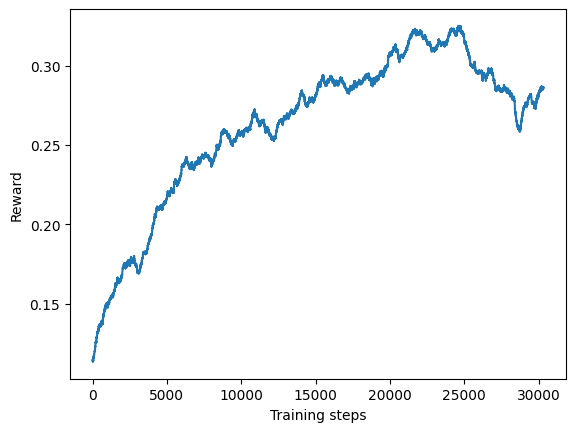

In [315]:


import torch
from time import time
from DocBuilder.utils import split_list_to_batch, restore_batched_list, unbind_sparse, top_k_sparse, tensor_retuen_type
from DocBuilder.Retriever_k_means import cluster_builder
import matplotlib.pyplot as plt
with open("reward_number.txt", "r") as f:
    r = f.readlines()
r = [float(i) for i in r][:]
print(len(r))
moving_avg = []
ma = sum(r[:50])/50
ratio=1-10/len(r)
for x in r:
    ma = ratio * ma + (1-ratio) * x
    moving_avg.append(ma)

plt.ylabel("Reward")
plt.xlabel("Training steps")
plt.plot(moving_avg)
plt.show()

In [225]:

def compute_gae(rewards, values, dones, next_value):
    # rewards shape: (sequence_length,)
    # values shape: (sequence_length,)
    # dones shape: (sequence_length,)
    # next_value shape: scalar

    values = values + [next_value,]  # Shape: (sequence_length + 1,)
    gae = 0
    returns = []
    for step in reversed(range(len(rewards))):
        delta = rewards[step] + 0.99 * values[step + 1] * (1 - dones[step]) - values[step]  # Shape: scalar
        gae = delta + 0.99 * 0.95 * (1 - dones[step]) * gae  # Shape: scalar
        returns.insert(0, gae + values[step])  # Shape: scalar
    return returns  # Shape: (sequence_length,)
values = [1]*60

for i in range(10):
    values = compute_gae([0,0,1,0,0,2]*10, values, [0]*59+[1], 0)
    print(values)

[8.26877885295075, 8.739265128070972, 9.239516350952654, 8.708151356674804, 9.206434191041792, 9.736240500841884, 8.173036151878662, 8.637465339583905, 9.131276278132807, 8.593063559949822, 9.084065454492102, 9.606130201480171, 8.034694525763074, 8.49037163823825, 8.97487680833413, 8.426769599504658, 8.907251036155936, 9.418129756678294, 7.834800379243267, 8.277831344224634, 8.748890318154846, 8.186486250031734, 8.651766347721141, 9.146482028411633, 7.545967069018215, 7.9707252195834295, 8.422355363725071, 7.839293316028783, 8.2826085231566, 8.753969721591282, 7.12862277681157, 7.526977965775194, 7.950534785513231, 7.337623376409602, 7.7492008255285505, 8.1868164014126, 6.525588943554067, 6.885793666724154, 7.268786461163375, 6.6127447752933275, 6.97846334427786, 7.367318813692568, 5.654246479205281, 5.959326400005615, 6.283706964386619, 5.565344991373332, 5.864800628786106, 6.183201093871457, 4.3952164740791675, 4.6206448421894395, 4.860334760435342, 4.051924253519768, 4.2556345066664